## Import Libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset preparation

Load data

In [19]:
bank_path = './bank+marketing/bank.csv'

# Load bank.csv
data = pd.read_csv(bank_path, sep=';', skiprows=1, names=[
    'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
    'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'
])

data_display = data.copy()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
le_dict = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = le_dict[col].fit_transform(data[col])
print(data_display.head())
print("Bank Marketing - Data shape:", data.shape)

X_bank = data.drop('y', axis=1)  # Features
y_bank = data['y'].map({'yes': 1, 'no': 0})  # Target: yes=1, no=0

# Scale features
scaler_bank = StandardScaler()
X_bank_scaled = scaler_bank.fit_transform(X_bank)

print("Bank Marketing - Features shape:", X_bank_scaled.shape)
print("Bank Marketing - Target shape:", y_bank.shape)

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
Bank Marketing - Data shape: (4521, 17)
Bank Marketing - Features shape: (4521, 16)
Bank Marketing - Target sha

Data Exploration

In [20]:
data_display.describe()
data_display.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Split proportions and perform

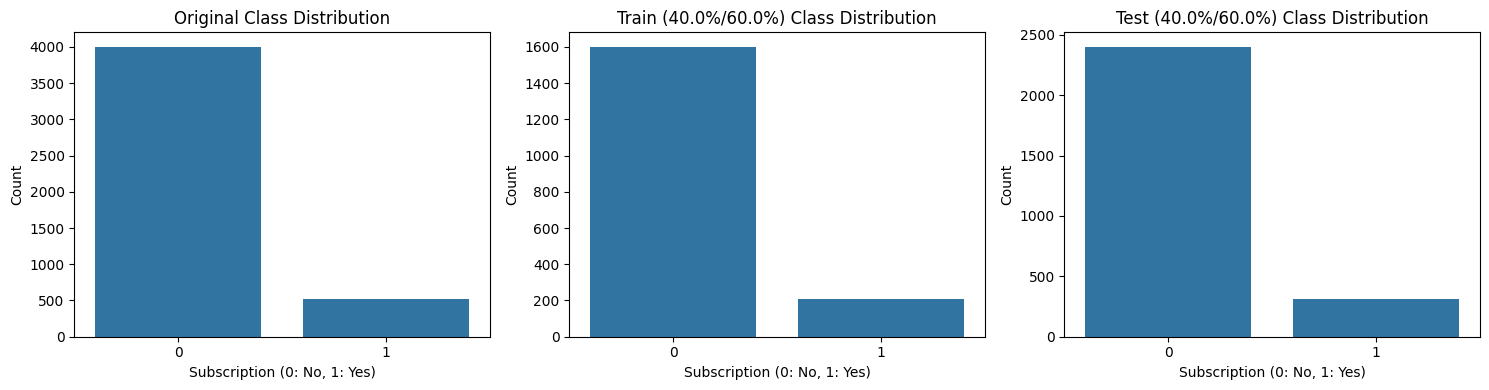


Proportions for 40.0%/60.0% split:
Original class distribution (%): y
0    88.476001
1    11.523999
Name: proportion, dtype: float64
Train class distribution (%): y
0    88.495575
1    11.504425
Name: proportion, dtype: float64
Test class distribution (%): y
0    88.462956
1    11.537044
Name: proportion, dtype: float64


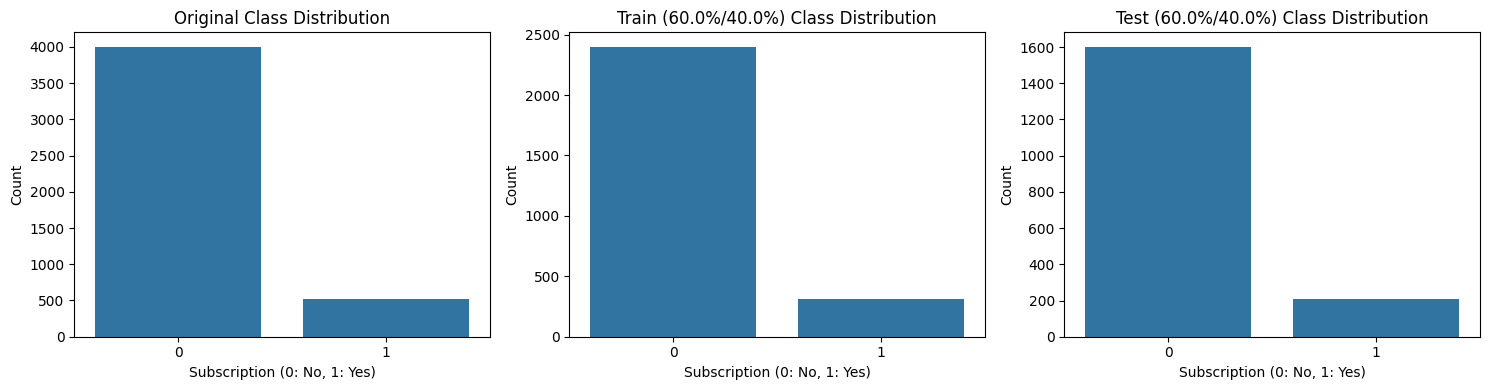


Proportions for 60.0%/40.0% split:
Original class distribution (%): y
0    88.476001
1    11.523999
Name: proportion, dtype: float64
Train class distribution (%): y
0    88.458702
1    11.541298
Name: proportion, dtype: float64
Test class distribution (%): y
0    88.501935
1    11.498065
Name: proportion, dtype: float64


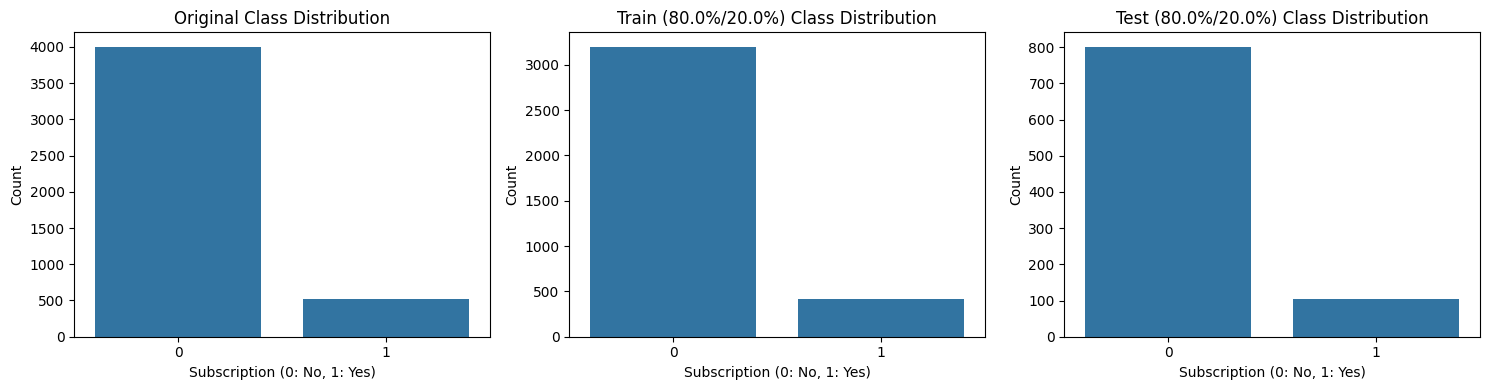


Proportions for 80.0%/20.0% split:
Original class distribution (%): y
0    88.476001
1    11.523999
Name: proportion, dtype: float64
Train class distribution (%): y
0    88.46792
1    11.53208
Name: proportion, dtype: float64
Test class distribution (%): y
0    88.508287
1    11.491713
Name: proportion, dtype: float64


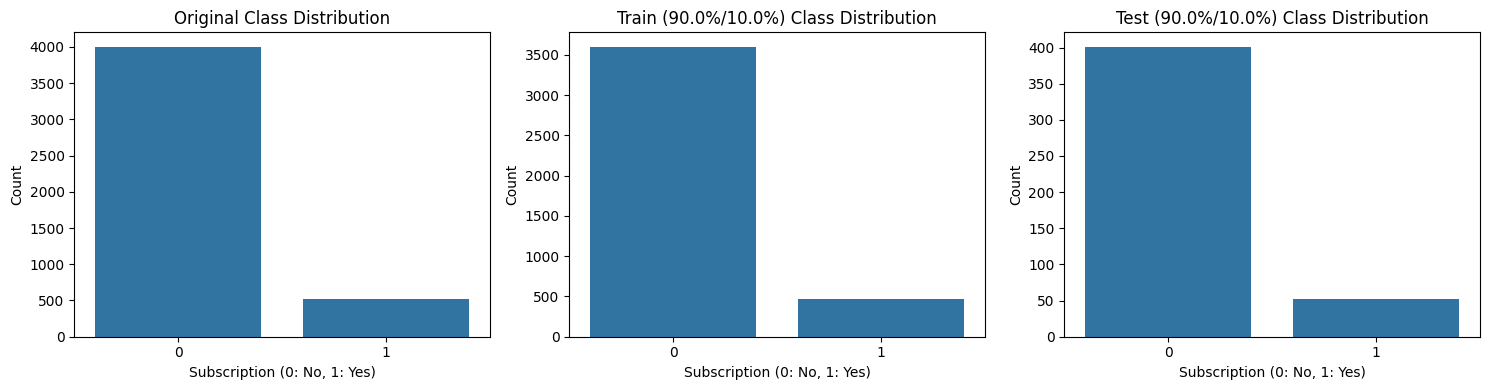


Proportions for 90.0%/10.0% split:
Original class distribution (%): y
0    88.476001
1    11.523999
Name: proportion, dtype: float64
Train class distribution (%): y
0    88.470993
1    11.529007
Name: proportion, dtype: float64
Test class distribution (%): y
0    88.520971
1    11.479029
Name: proportion, dtype: float64


In [21]:
proportions = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
subsets = {}

for train_size, test_size in proportions:
    X_train, X_test, y_train, y_test = train_test_split(
    X_bank_scaled, y_bank, train_size=train_size, test_size=test_size, 
        stratify=y_bank, shuffle=True, random_state=42
    )
        
    # Lưu trữ 4 tập hợp
    subsets[f'feature_train_{int(train_size*100)}'] = X_train
    subsets[f'label_train_{int(train_size*100)}'] = y_train
    subsets[f'feature_test_{int(test_size*100)}'] = X_test
    subsets[f'label_test_{int(test_size*100)}'] = y_test
        
    # Hiển thị phân phối lớp 
    plt.figure(figsize=(15, 4))
    
    # Original dataset
    plt.subplot(1, 3, 1)
    sns.countplot(x=y_bank, order=[0, 1])
    plt.title('Original Class Distribution')
    plt.xlabel('Subscription (0: No, 1: Yes)')
    plt.ylabel('Count')
        
    # Training set
    plt.subplot(1, 3, 2)
    sns.countplot(x=y_train, order=[0, 1])
    plt.title(f'Train ({train_size*100}%/{test_size*100}%) Class Distribution')
    plt.xlabel('Subscription (0: No, 1: Yes)')
    plt.ylabel('Count')
    
    # Test set
    plt.subplot(1, 3, 3)
    sns.countplot(x=y_test, order=[0, 1])
    plt.title(f'Test ({train_size*100}%/{test_size*100}%) Class Distribution')
    plt.xlabel('Subscription (0: No, 1: Yes)')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
        
    # In thông tin phân phối lớp
    print(f"\nProportions for {train_size*100}%/{test_size*100}% split:")
    print("Original class distribution (%):", y_bank.value_counts(normalize=True) * 100)
    print("Train class distribution (%):", y_train.value_counts(normalize=True) * 100)
    print("Test class distribution (%):", y_test.value_counts(normalize=True) * 100)

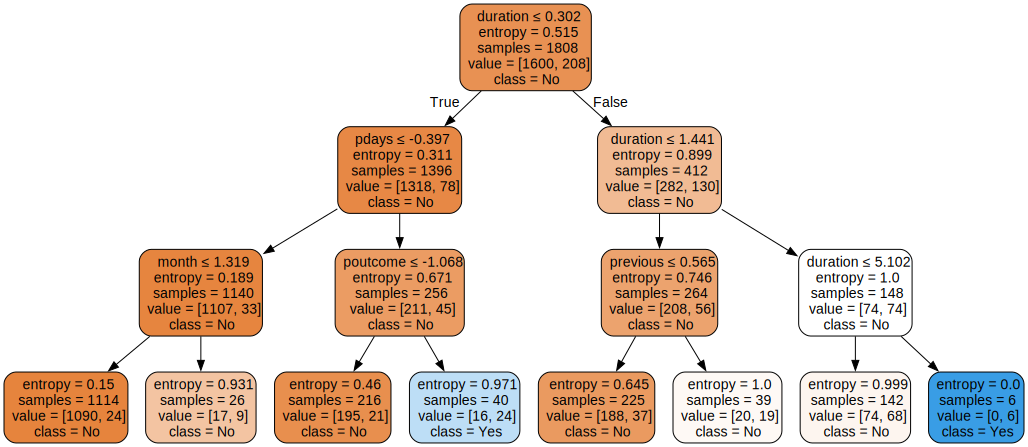

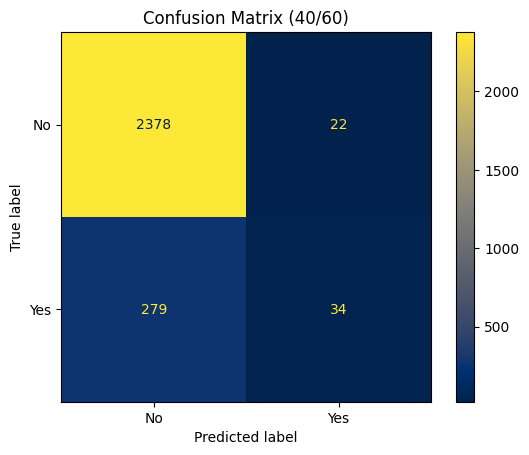

Classification Report (40/60):
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2400
           1       0.61      0.11      0.18       313

    accuracy                           0.89      2713
   macro avg       0.75      0.55      0.56      2713
weighted avg       0.86      0.89      0.85      2713



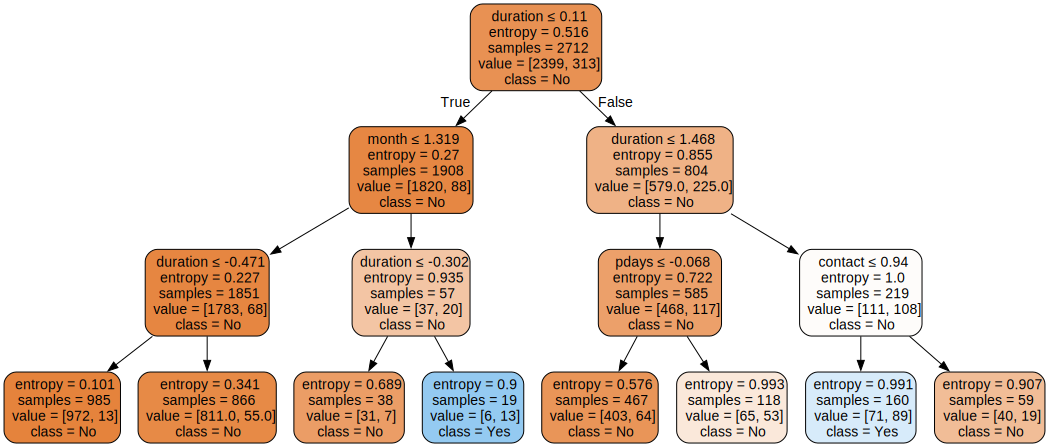

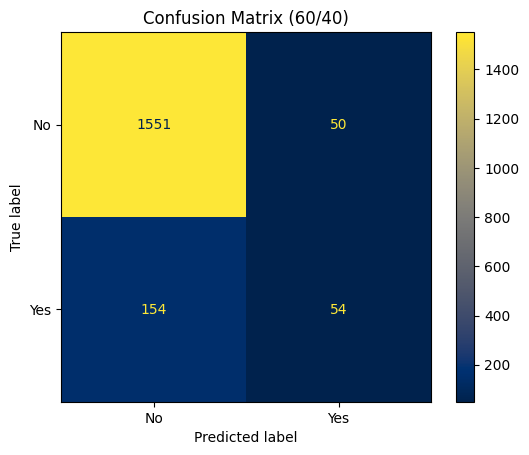

Classification Report (60/40):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1601
           1       0.52      0.26      0.35       208

    accuracy                           0.89      1809
   macro avg       0.71      0.61      0.64      1809
weighted avg       0.86      0.89      0.87      1809



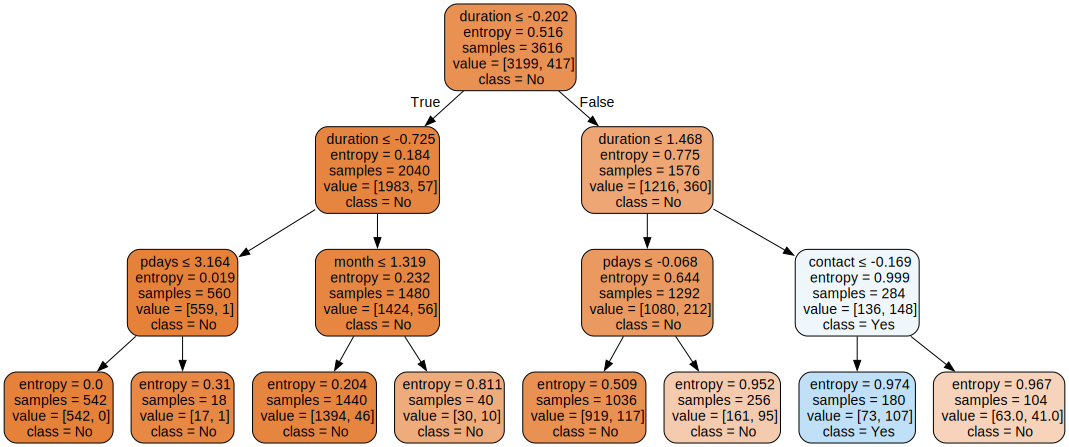

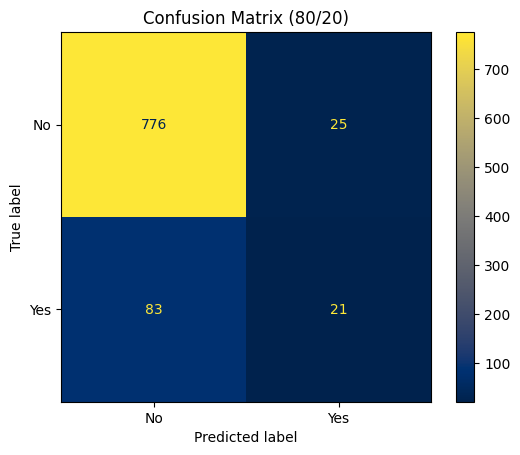

Classification Report (80/20):
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       801
           1       0.46      0.20      0.28       104

    accuracy                           0.88       905
   macro avg       0.68      0.59      0.61       905
weighted avg       0.85      0.88      0.86       905



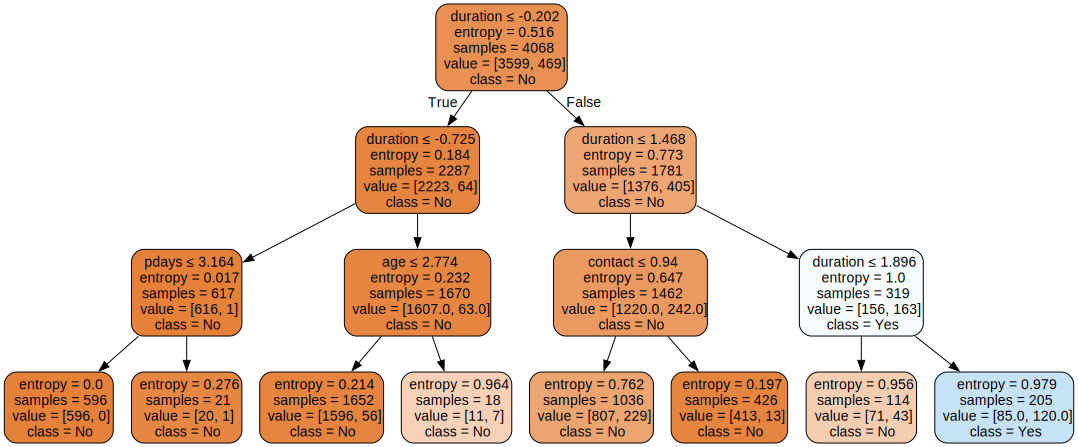

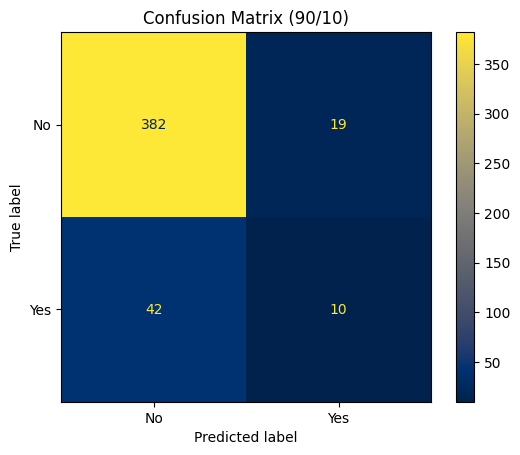

Classification Report (90/10):
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       401
           1       0.34      0.19      0.25        52

    accuracy                           0.87       453
   macro avg       0.62      0.57      0.59       453
weighted avg       0.84      0.87      0.85       453



In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import graphviz
import matplotlib.pyplot as plt

# 2.2 & 2.3: Train/Test cho các tỷ lệ khác nhau
proportions = [40, 60, 80, 90]
results = {}

for p in proportions:
    X_train = subsets[f'feature_train_{p}']
    y_train = subsets[f'label_train_{p}']
    X_test = subsets[f'feature_test_{100 - p}']
    y_test = subsets[f'label_test_{100 - p}']

    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
    clf.fit(X_train, y_train)
    
    # Vẽ cây
    dot_data = export_graphviz(clf, out_file=None,
                               feature_names=X_bank.columns,
                               class_names=['No', 'Yes'],
                               filled=True, rounded=True,
                               special_characters=True)
    graph = graphviz.Source(dot_data)
    display(graph)

    # Dự đoán & đánh giá
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    results[f'{p}/{100 - p}'] = {
        'classifier': clf,
        'report': report,
        'confusion_matrix': cm,
        'accuracy': accuracy_score(y_test, y_pred)
    }

    # Hiển thị confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
    disp.plot(cmap="cividis")
    plt.title(f'Confusion Matrix ({p}/{100 - p})')
    plt.show()

    print(f"Classification Report ({p}/{100 - p}):")
    print(classification_report(y_test, y_pred))


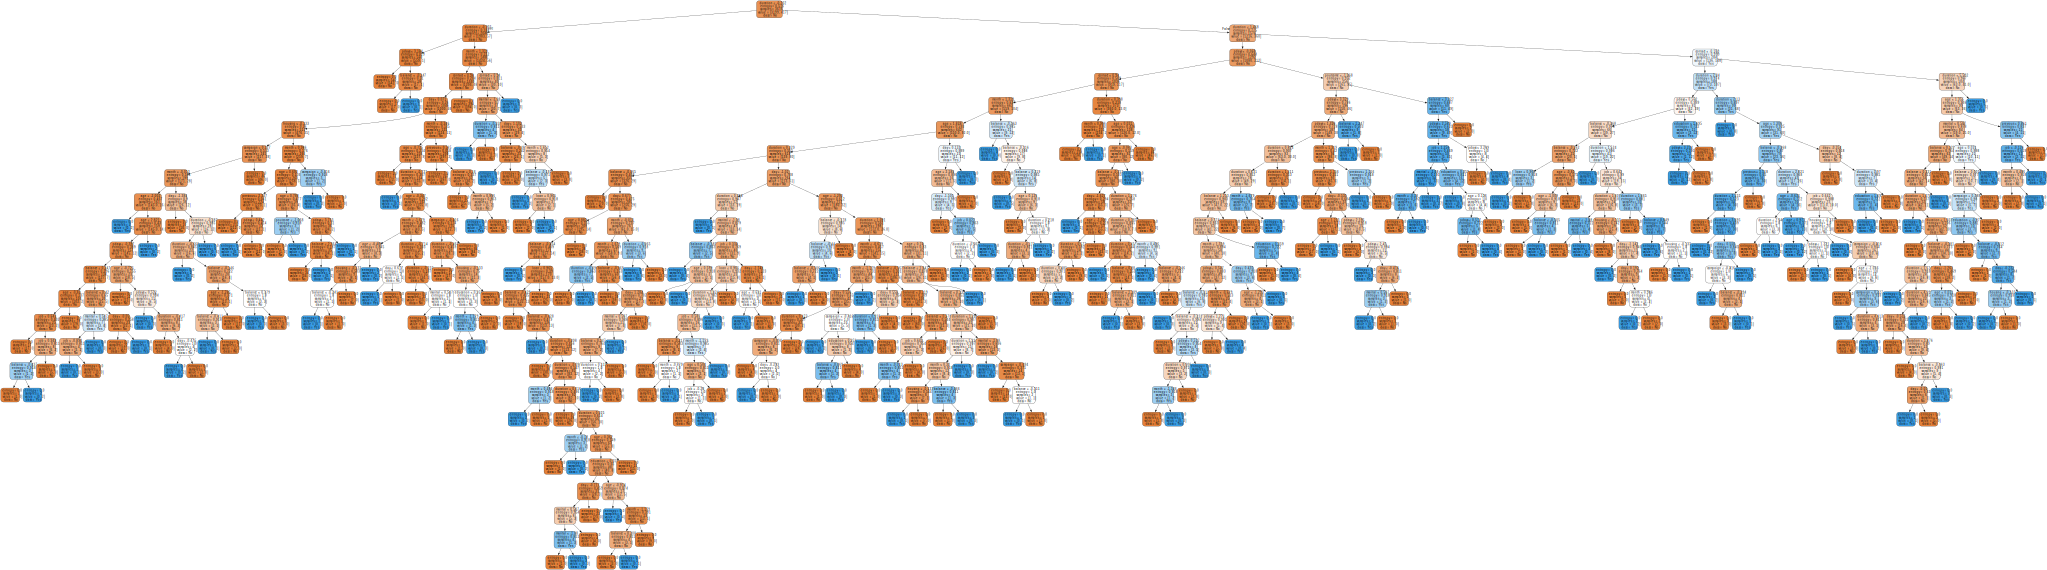

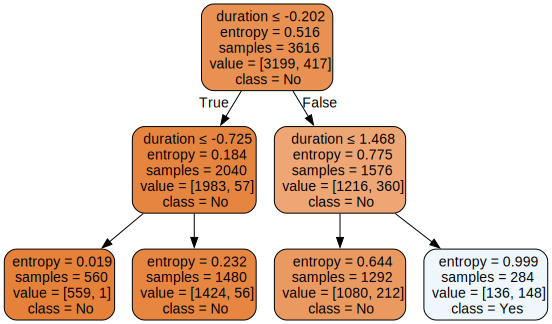

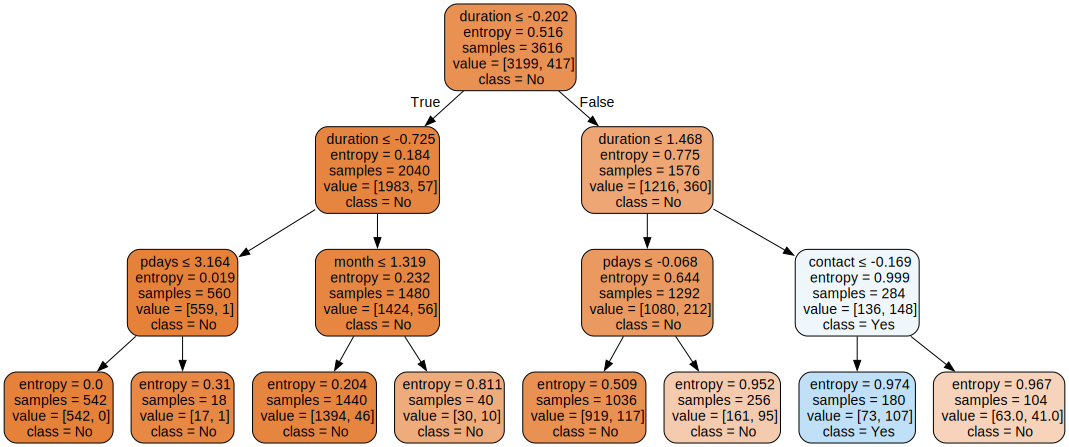

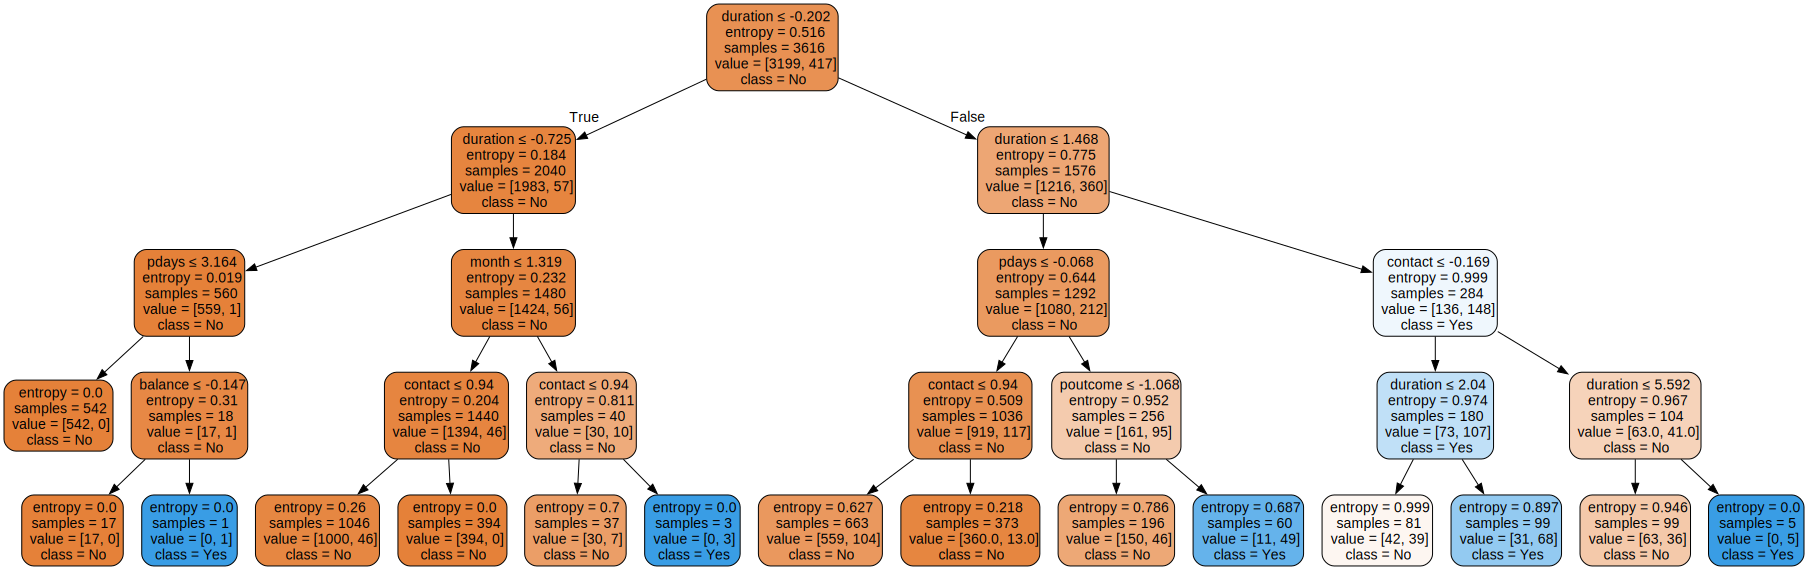

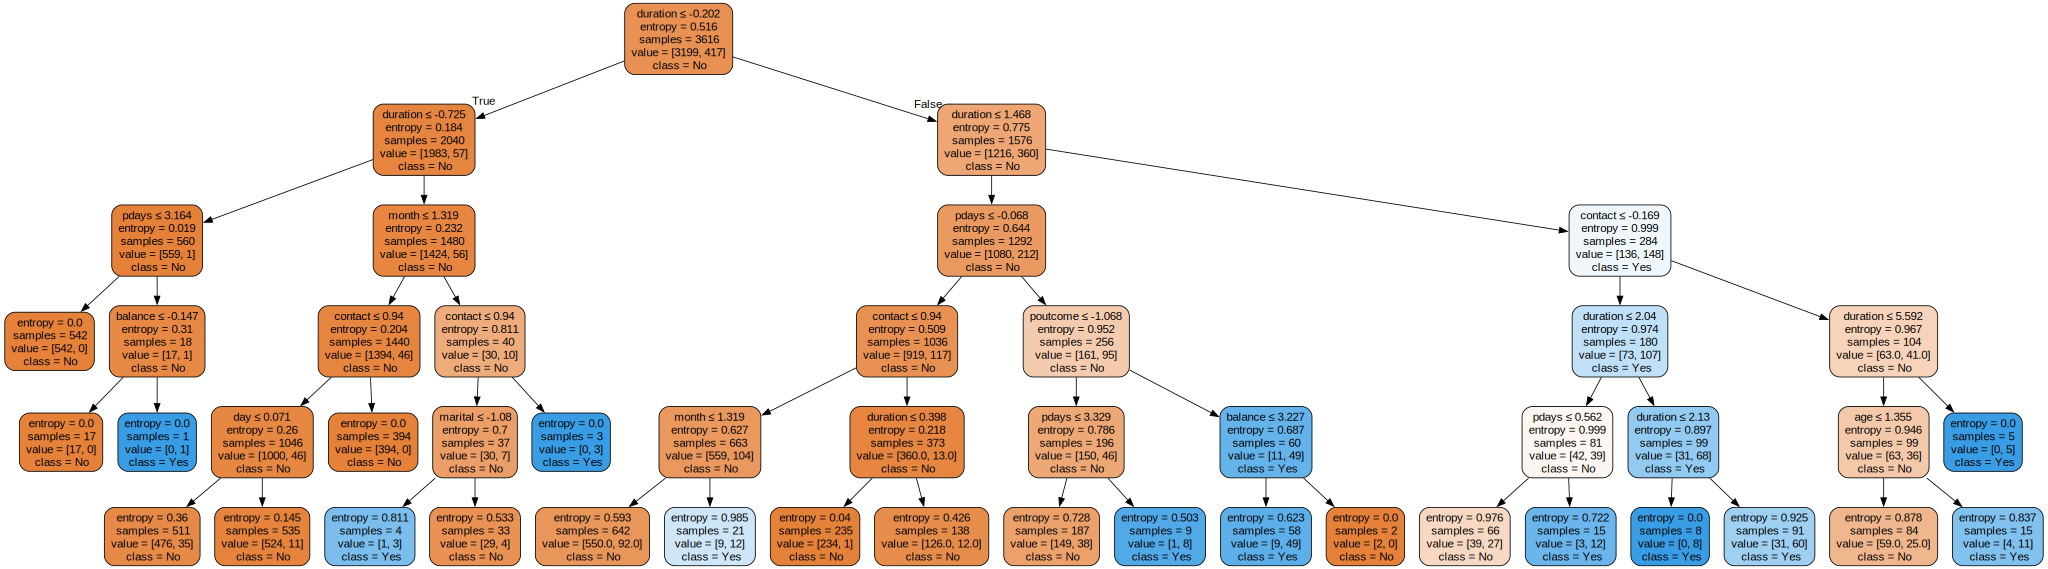

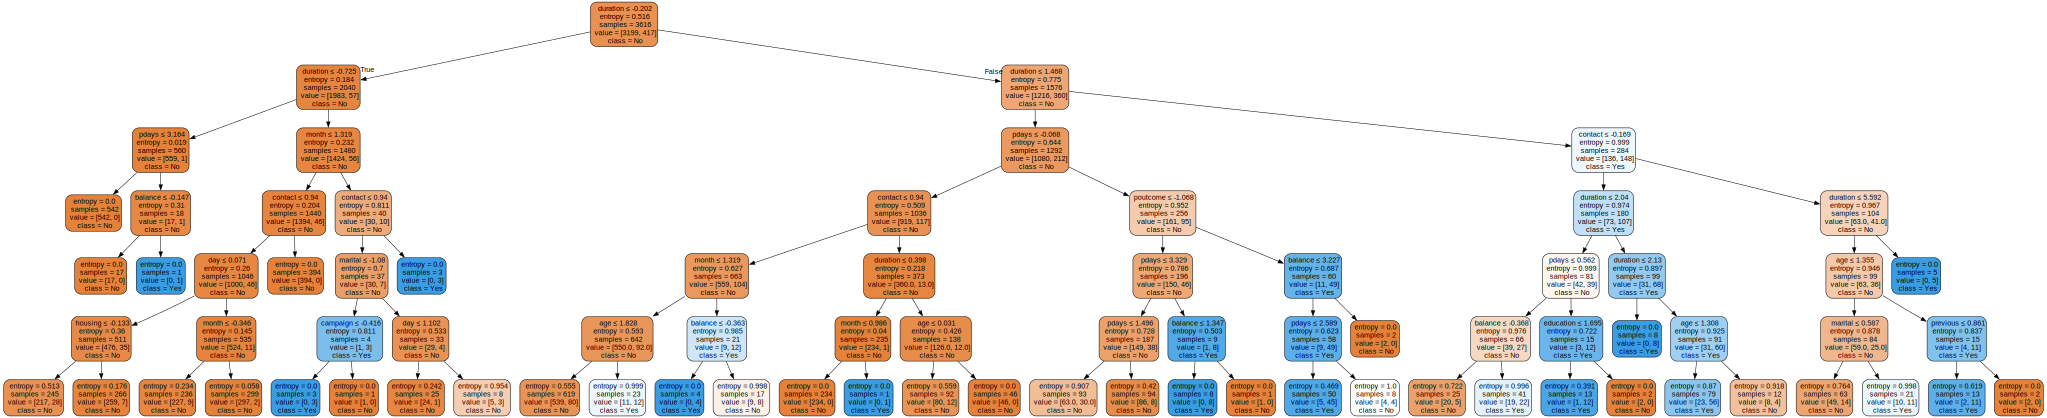

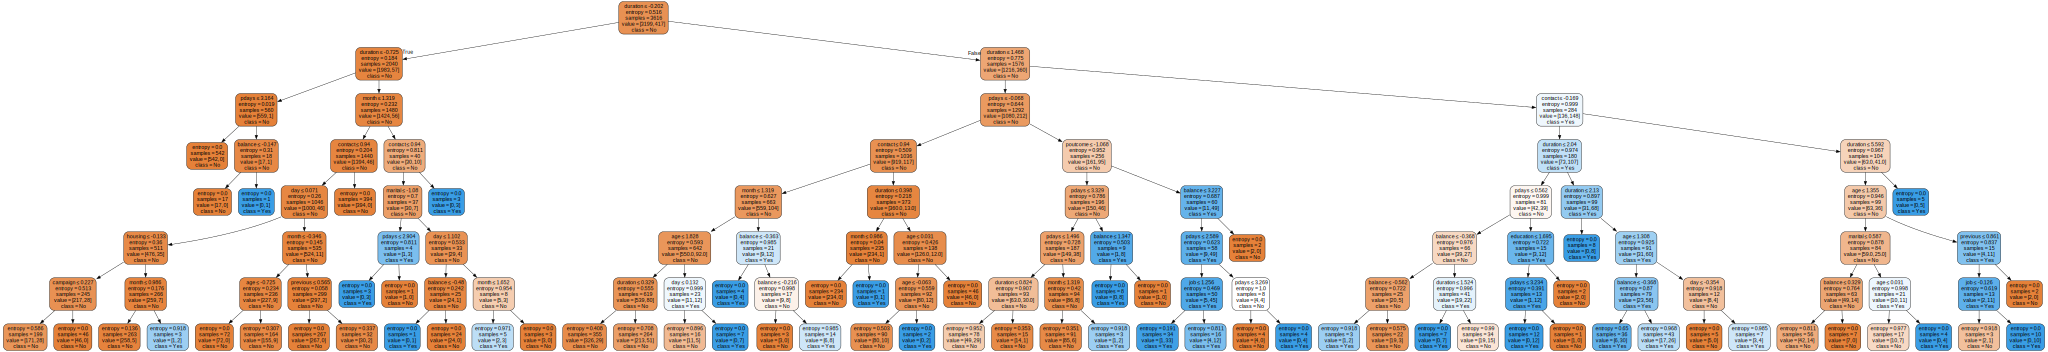

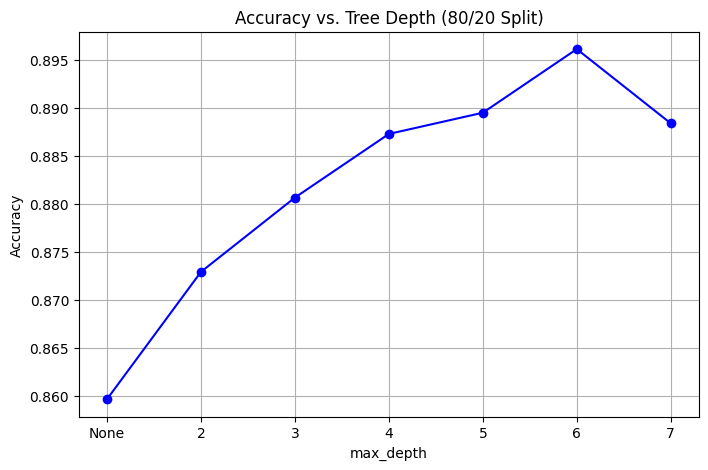

Accuracy table (80/20 split):
max_depth = None --> Accuracy: 0.8597
max_depth =    2 --> Accuracy: 0.8729
max_depth =    3 --> Accuracy: 0.8807
max_depth =    4 --> Accuracy: 0.8873
max_depth =    5 --> Accuracy: 0.8895
max_depth =    6 --> Accuracy: 0.8961
max_depth =    7 --> Accuracy: 0.8884


In [ ]:
# 2.4: Độ sâu và độ chính xác (trên tập 80/20)
depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

X_train = subsets['feature_train_80']
y_train = subsets['label_train_80']
X_test = subsets['feature_test_20']
y_test = subsets['label_test_20']

for d in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    dot_data = export_graphviz(clf, out_file=None,
                               feature_names=X_bank.columns,
                               class_names=['No', 'Yes'],
                               filled=True, rounded=True,
                               special_characters=True)
    graph = graphviz.Source(dot_data)
    display(graph)

plt.figure(figsize=(8, 5))
depth_labels = ['None' if d is None else str(d) for d in depths]
plt.plot(depth_labels, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs. Tree Depth (80/20 Split)')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# In bảng kết quả
print("Accuracy table (80/20 split):")
for d, acc in zip(depth_labels, accuracies):
    print(f"max_depth = {d:>4} --> Accuracy: {acc:.4f}")